In [1]:
# Import librarries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import the data sets into Jupyter Turn project folder path into a string

path = r'/Users/omkargopalakrishnan/Instacart Basket Analysis'


In [15]:
# Import dataframe from Task 4.9

ords_prods_merge = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_combined_merged_new_variables_derived_aggregated.pkl'))

<Axes: xlabel='orders_day_of_week'>

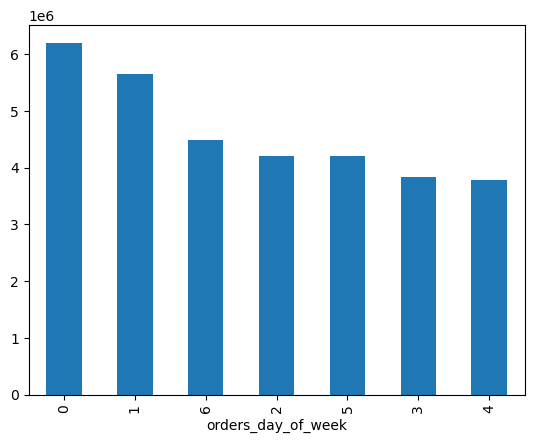

In [7]:
# Create a bar chart. The observations are ordered from largest to smallest. This is great as it allows you to quickly determine the largest and smallest categories

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

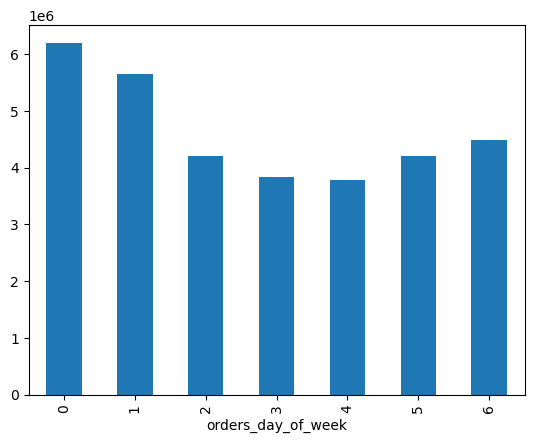

In [8]:
# The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest)

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# The same trick can be used when printing frequencies

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [10]:
# You can reorder your columns to appear in their indexed order when printing frequencies, too

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

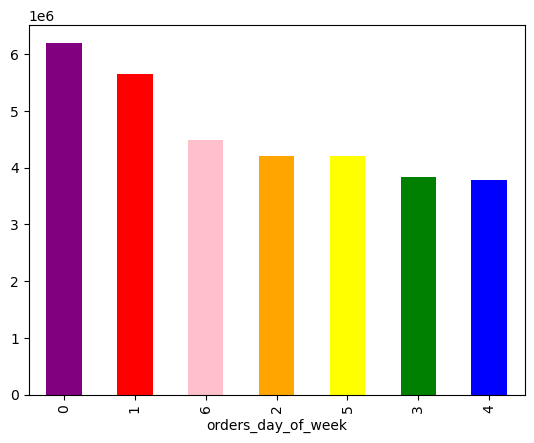

In [19]:
# For a colourful bar chart, simply include an indexed list of the colors you want for your bars as an argument in your function. Now, your bar chart has been saved within the bar object, and you’ll be able to access it any time you like by calling bar.figure. 

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [22]:
# Use the figure.savefig() function to export it outside of Jupyter in the form of an image file. The above command accesses the figure within the bar object and applies the savefig() function to it, which, as you might imagine, is what “saves” the “figure” to a file.

bar.figure.savefig(os.path.join(path, 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

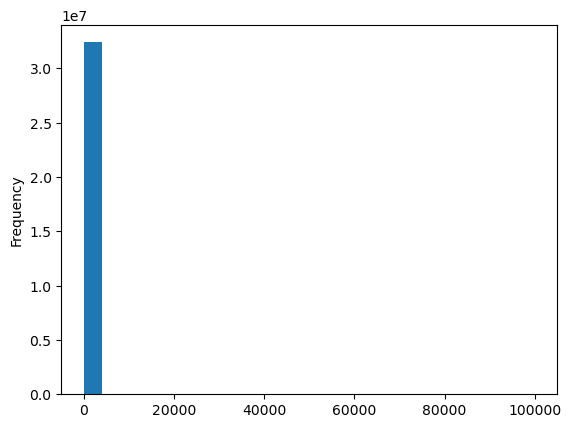

In [24]:
# You’ll notice it follows the same logic as the code for creating a bar chart. The only difference lies in the use of hist() instead of bar() after the plot. There’s also an extra argument that needs to go within the parentheses. This is how you determine the granularity of the histogram. A smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars.

ords_prods_merge['prices'].plot.hist(bins = 25)

In [28]:
# the describe() function gives you a quick list of descriptive statistics for a column

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [29]:
# To further investigate, you could also conduct a few checks for each specific statistic

ords_prods_merge['prices'].mean()

11.980225638383468

In [30]:
ords_prods_merge['prices'].median()

7.4

In [31]:
ords_prods_merge['prices'].max()

99999.0

In [32]:
# having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

<Axes: xlabel='prices', ylabel='prices'>

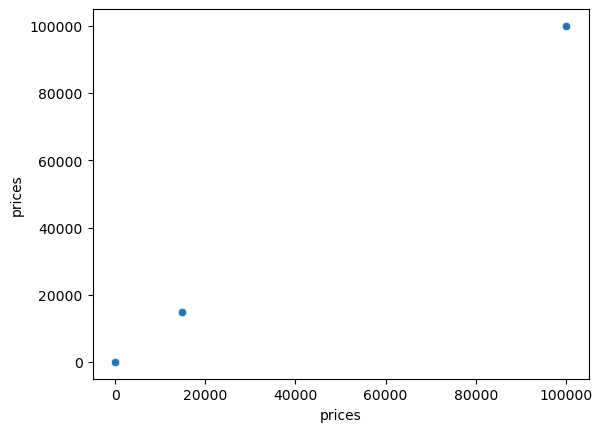

In [33]:
# Scatterplots are created by way of the scatterplot() function, which is included in the seaborn library (imported into your notebook as sns). Within the parentheses, you include arguments in the form of axes. Here, the “prices” column has been used for both the x- and y-axes. 

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [34]:
# first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier.

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,user_id,eval_set,order_number,...,busiest_period_of_day,price_range_loc,busiest_day,busiest_days,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,171,912404,17,prior,12,...,Most orders,High-range product,Regularly busy,Regularly busy,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,181,603376,17,prior,22,...,Most orders,High-range product,Regularly busy,Regularly busy,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1944,3264360,135,prior,2,...,Average orders,High-range product,Regularly busy,Regularly busy,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1945,892534,135,prior,3,...,Average orders,High-range product,Busiest day,Busiest days,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,5708,229704,342,prior,8,...,Average orders,High-range product,Regularly busy,Busiest days,16,Regular customer,114.426619,High_spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,3386542,2249946,204099,prior,29,...,Average orders,High-range product,Busiest day,Busiest days,39,Regular customer,1106.743956,High_spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,3386544,2363282,204099,prior,31,...,Most orders,High-range product,Busiest day,Busiest days,39,Regular customer,1106.743956,High_spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3391313,3181945,204395,prior,13,...,Most orders,High-range product,Regularly busy,Slowest days,15,Regular customer,451.153540,High_spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,3405096,2486215,205227,prior,7,...,Average orders,High-range product,Regularly busy,Slowest days,12,Regular customer,1178.381871,High_spender,12.0,Regular customer


In [35]:
# mark the high values as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs. The command looks for values above 100 within the “prices” column and assigns them a value. In this case, that new value is np.nan. This is a function from the NumPy library; it’s used to assign missing values.

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [36]:
# check whether the replacement was successful by running a max-value check on your “prices” column

ords_prods_merge['prices'].max()

25.0

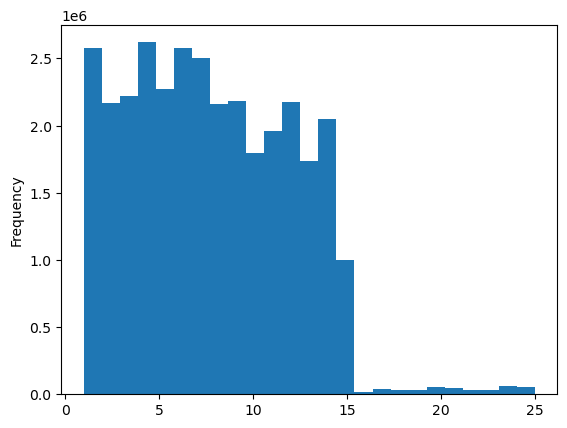

In [38]:
# retry that histogram of your “prices” column. Your results make much more sense now: most products are between $1 and $15, while a few are higher priced at $15 to $25.

hist = ords_prods_merge[ 'prices']. plot. hist(bins = 25)

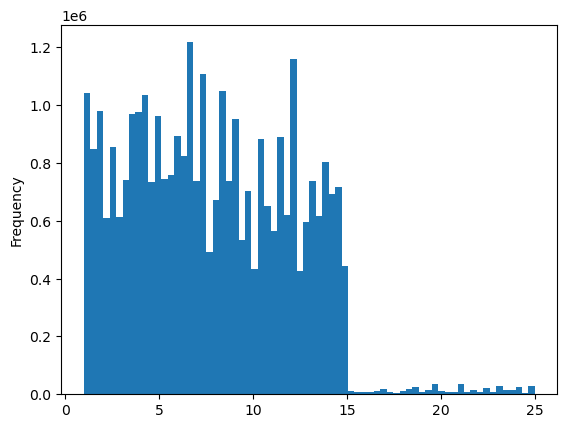

In [39]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. This will result in a histogram with more, thinner columns. Increasing the number of bins will allow you to see more variety in your histogram.

hist = ords_prods_merge[ 'prices']. plot. hist(bins = 70)

In [40]:
# Export the histogram

hist.figure.savefig(os.path.join(path, 'Visualizations', 'hist_orders_dow.png'))

In [41]:
# To avoid a memory error and/or have your browser crash, use the subsetting method to plot only the top or bottom 2,000,000 rows of the dataframe.

df = ords_prods_merge[:2000000]

In [42]:
# In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command. The seed is set via the NumPy function random.seed()
# In the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [43]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [44]:
np.random.rand()

0.9354668599465477

In [45]:
# The np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced.

np.random.rand(10)

array([0.06557465, 0.85698584, 0.24456371, 0.22683171, 0.17068366,
       0.27008946, 0.52534234, 0.83151571, 0.78153402, 0.0164016 ])

In [46]:
np.random.rand(10)

array([0.99588525, 0.68895442, 0.9491469 , 0.63012328, 0.9192488 ,
       0.87788077, 0.3936537 , 0.64745848, 0.73786691, 0.61518855])

In [48]:
# The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe.

In [49]:
# Create a List holding True/False values to the test np.random.rant() <= 0.7

dev = np. random. rand(len(ords_prods_merge)) <= 0.7

In [50]:
# # use your list to split your dataframe into two samples. Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [51]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge [~dev]

In [52]:
# Since the numbers match, you can assume that your subsetting procedure was at least successful in the technical sense.

len (ords_prods_merge)

32404859

In [53]:
len(big) + len(small)

32404859

In [54]:
# To speed up the processing time even further, reduce your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” 
# This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.

df_2 = small[['orders_day_of_week','prices']]

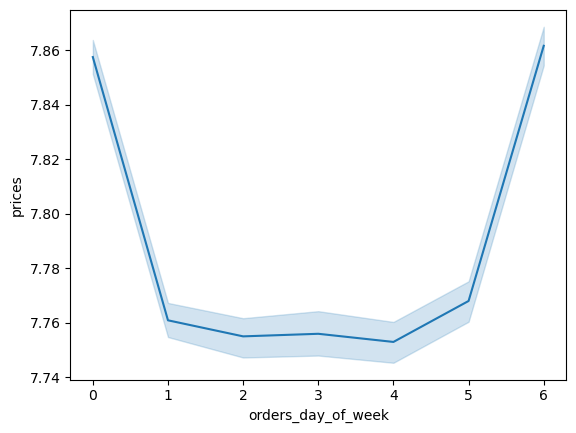

In [55]:
# Create line chart. Here, the sns.lineplot() function (from the seaborn library) is being used to create the line chart and save it to a new object, line. The arguments it needs are the dataframe you want to create the line chart from (df_2), the column you want to place on the x-axis (“orders_day_of_week”), and the column you want to place on the y-axis (“prices”).

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [56]:
line.figure.savefig(os.path.join(path, 'Visualizations', 'line_orders_dow.png'))